#### Assignment: Advanced Regression

#### Importing the required libraries

In [209]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [210]:
House_Data = pd.read_csv('train.csv')

In [211]:
House_Data.shape

(1460, 81)

In [212]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [213]:
House_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [214]:
House_Data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###### Checking the dataset for the amount of nulls present

In [215]:
round(House_Data.isnull().sum()/len(House_Data.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

##### Considering 10% as my threshold and dropping the column having more then the threshold

In [216]:
round(House_Data.isnull().sum()/len(House_Data.index),2)[round(House_Data.isnull().sum()/
                                                                 len(House_Data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [217]:
House_Data = House_Data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

###### Checking the columns where the missing values less than 10%

In [158]:
round(House_Data.isnull().sum()/len(House_Data.index),2)[round(House_Data.isnull().sum()/
                                                                 len(House_Data.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

- Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [218]:
House_Data['YearBuilt_Old'] = House_Data.YearBuilt.max()-House_Data.YearBuilt
House_Data['YearRemodAdd_Old'] = House_Data.YearRemodAdd.max()-House_Data.YearRemodAdd
House_Data['GarageYrBlt_Old'] = House_Data.GarageYrBlt.max()-House_Data.GarageYrBlt
House_Data['YrSold_Old'] = House_Data.YrSold.max()-House_Data.YrSold
House_Data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
302,2001,2002,2001.0,2006,9,8,9.0,4
304,1880,2002,2003.0,2008,130,8,7.0,2
1220,1964,1964,1964.0,2006,46,46,46.0,4
760,1959,1959,2008.0,2009,51,51,2.0,1
927,1968,1968,1968.0,2008,42,42,42.0,2
971,2003,2004,2003.0,2009,7,6,7.0,1
1164,1978,1978,1978.0,2007,32,32,32.0,3
510,1951,2000,1951.0,2009,59,10,59.0,1
944,1958,1958,1958.0,2009,52,52,52.0,1
678,2008,2008,2008.0,2009,2,2,2.0,1


##### Dropping the actual Year columns

In [219]:
House_Data = House_Data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

###### Imputing missing value

- Imputing GarageYrBlt_Old with -1 as these house donot have garage

In [220]:
House_Data.MasVnrType.fillna('None',inplace=True)
House_Data.MasVnrArea.fillna(House_Data.MasVnrArea.mean(),inplace=True)
House_Data.BsmtQual.fillna('TA',inplace=True)
House_Data.BsmtCond.fillna('TA',inplace=True)
House_Data.BsmtExposure.fillna('No',inplace=True)
House_Data.BsmtFinType1.fillna('Unf',inplace=True)
House_Data.BsmtFinType2.fillna('Unf',inplace=True)
House_Data.GarageType.fillna('Attchd',inplace=True)
House_Data.GarageYrBlt_Old.fillna(-1,inplace=True)
House_Data.GarageFinish.fillna('Unf',inplace=True)
House_Data.GarageQual.fillna('TA',inplace=True)
House_Data.GarageCond.fillna('TA',inplace=True)

- 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [221]:
House_Data.Street.value_counts()
House_Data.Utilities.value_counts()
House_Data = House_Data.drop(['Street','Utilities'],axis='columns')

- 'Id' column is also of no use for our analysis hence dropping the column

In [222]:
House_Data = House_Data.drop('Id',axis='columns')

In [223]:
House_Data[list(House_Data.dtypes[House_Data.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [165]:
# sns.boxplot(y = House_Data['PoolArea'])
# House_Data['WoodDeckSF'].value_counts()

###### Plotting graph for the EDA 

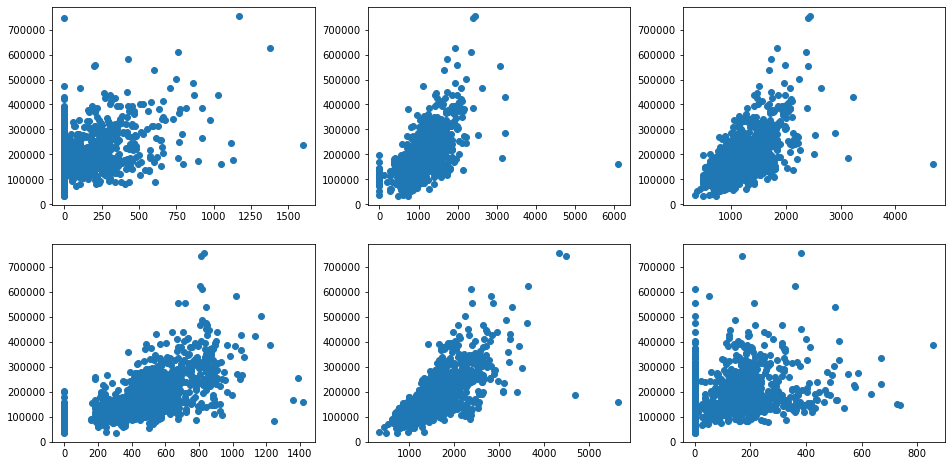

In [224]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(House_Data.MasVnrArea,House_Data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(House_Data.TotalBsmtSF,House_Data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(House_Data['1stFlrSF'],House_Data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(House_Data['GarageArea'],House_Data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(House_Data['GrLivArea'],House_Data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(House_Data['WoodDeckSF'],House_Data.SalePrice)

###### Plotting heatmap to check the corellation between varables

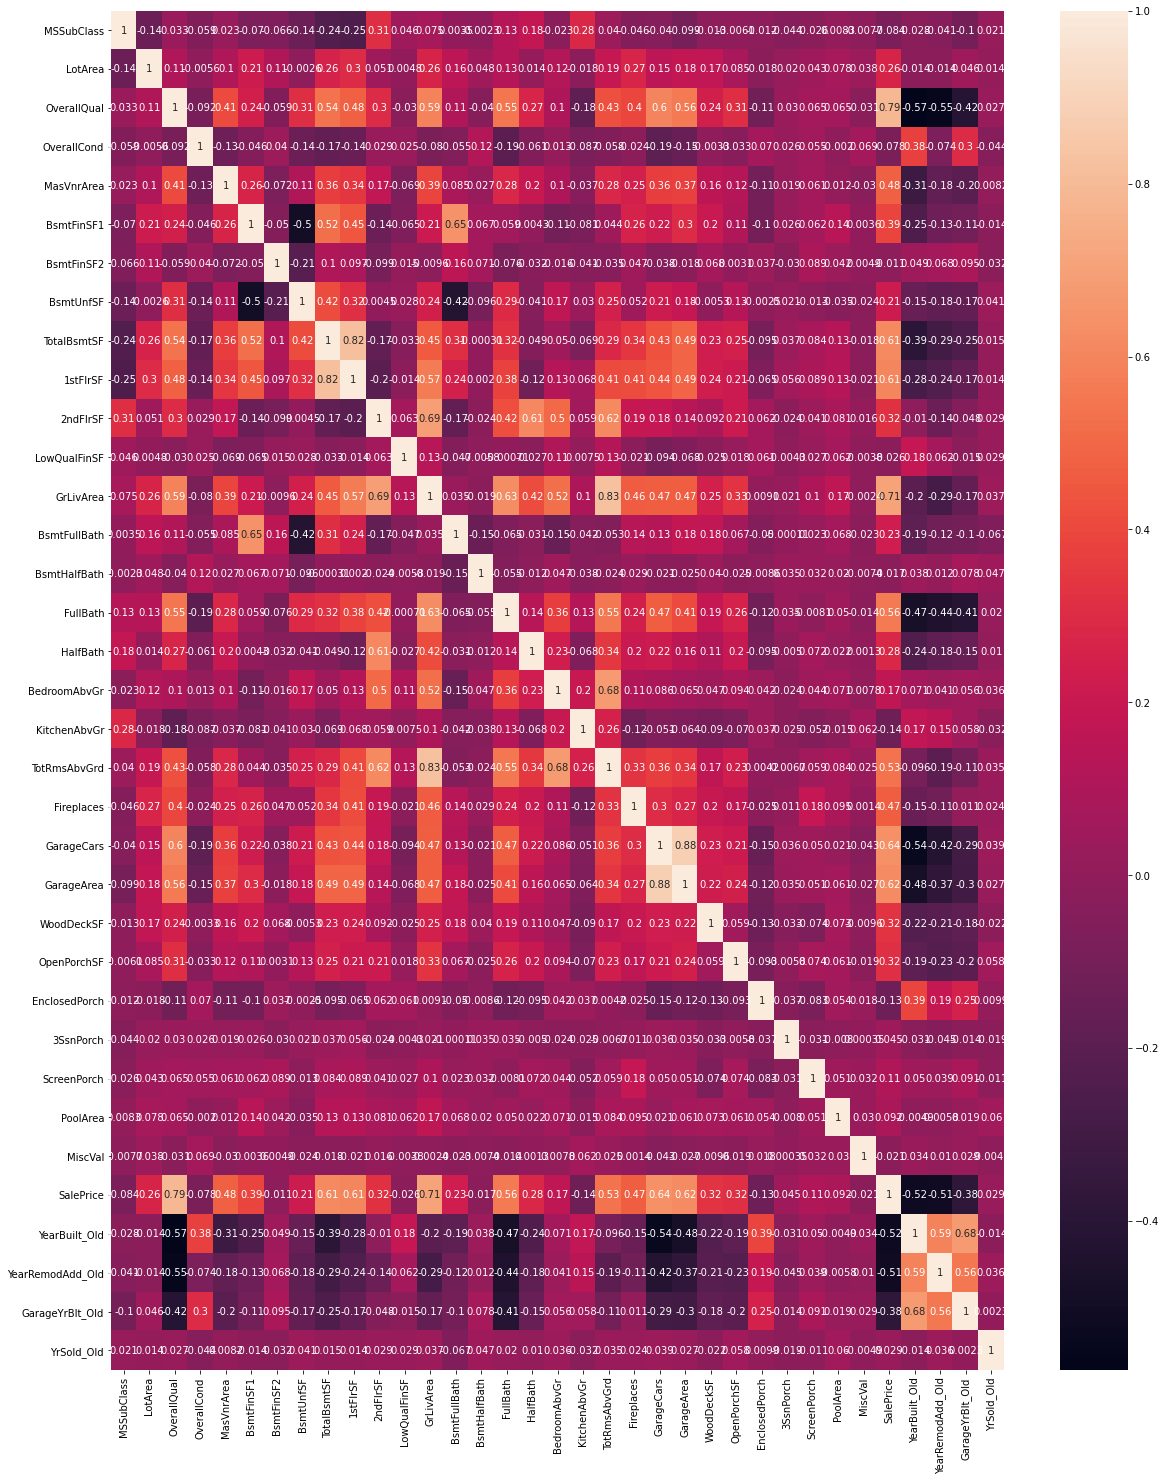

In [229]:
plt.figure(figsize=(20,25))
sns.heatmap(House_Data[list(House_Data.dtypes[House_Data.dtypes!='object'].index)].corr(),annot=True)
plt.show()


In [230]:
House_Data.shape

(1460, 71)

In [231]:
num_col = list(House_Data.dtypes[House_Data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

House_Data = drop_outliers(House_Data)

In [232]:
House_Data.shape

(1441, 71)

In [233]:
House_Data[list(House_Data.dtypes[House_Data.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Checking for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [234]:
House_Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [235]:
House_Data['LandSlope'] = House_Data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
House_Data['ExterQual'] = House_Data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
House_Data['BsmtQual'] = House_Data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
House_Data['BsmtCond'] = House_Data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
House_Data['BsmtExposure'] = House_Data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
House_Data['BsmtFinType1'] = House_Data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
House_Data['BsmtFinType2'] = House_Data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
House_Data['HeatingQC'] = House_Data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
House_Data['CentralAir'] = House_Data.CentralAir.map({'N':0,'Y':1})
House_Data['KitchenQual'] = House_Data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
House_Data['GarageFinish'] = House_Data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
House_Data['GarageQual'] = House_Data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
House_Data['GarageCond'] = House_Data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
House_Data['ExterCond'] = House_Data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
House_Data['LotShape'] = House_Data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [236]:
House_Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


- Creating and joining dummy column with the actual dataset

In [237]:
dummy_col = pd.get_dummies(House_Data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

House_Data = pd.concat([House_Data,dummy_col],axis='columns')

House_Data = House_Data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

- Checking the distribution of our target variable before scaling and Splitting

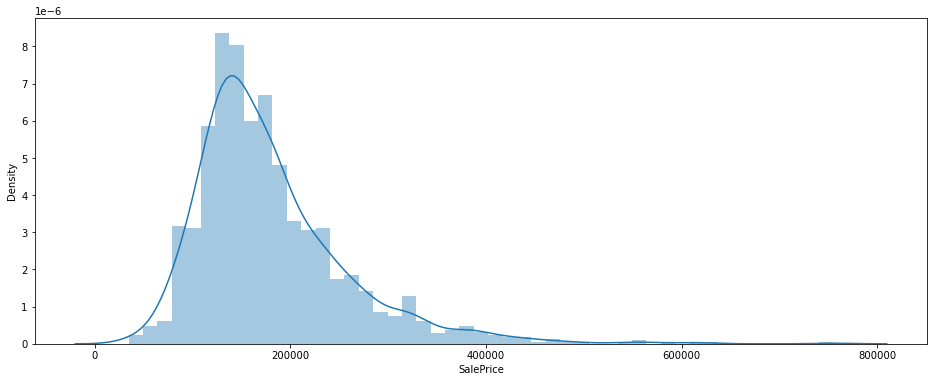

In [238]:

plt.figure(figsize=(16,6))
sns.distplot(House_Data.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

In [239]:
df_train,df_test = train_test_split(House_Data,train_size=0.7,test_size=0.3,random_state=42)

In [240]:
House_Data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset

In [241]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

- Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

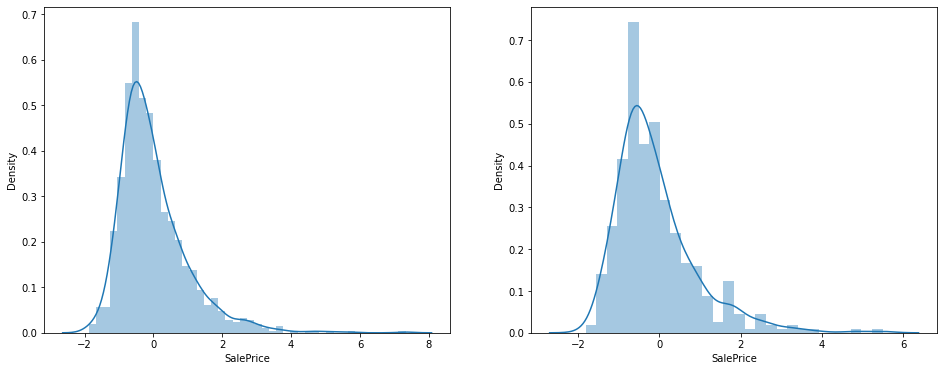

In [242]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

- Spliting the dependent and independent variable

In [243]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [244]:

y_test = df_test.pop('SalePrice')
X_test = df_test

- Now using RFE lets try to to find the optimal number of feature
- using RFE directly

In [245]:
len(X_train.columns)


192

In [246]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [247]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [248]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

- Lets filter the train and test set for the RFE selected columns

In [249]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

#### Trying with Lasso regression model

In [250]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


In [251]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.305),
 ('LotArea', -0.112),
 ('LotShape', 0.194),
 ('LandSlope', 0.142),
 ('OverallQual', 0.091),
 ('OverallCond', 0.14),
 ('MasVnrArea', 0.038),
 ('ExterQual', -0.0),
 ('ExterCond', 0.061),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.058),
 ('BsmtExposure', -0.014),
 ('BsmtFinType1', 0.324),
 ('BsmtFinSF1', 0.118),
 ('BsmtFinType2', 0.091),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.085),
 ('TotalBsmtSF', -0.082),
 ('HeatingQC', 0.192),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.108),
 ('2ndFlrSF', 0.132),
 ('LowQualFinSF', 0.378),
 ('GrLivArea', 0.098),
 ('BsmtFullBath', 0.374),
 ('BsmtHalfBath', 0.541),
 ('FullBath', 0.145),
 ('HalfBath', 0.331),
 ('BedroomAbvGr', 0.086),
 ('KitchenAbvGr', 0.05),
 ('KitchenQual', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -1.991),
 ('GarageFinish', 0.0),
 ('GarageCars', 0.115),
 ('GarageArea', -0.0),
 ('GarageQual', -0.167),
 ('GarageCond', 0.094),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('Sc

- Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [252]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [253]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.024633,0.003457,0.003392,0.000798,0.001,{'alpha': 0.001},0.858411,0.919698,0.823289,0.884340,...,0.909394,0.903553,0.900062,0.903985,0.898896,0.914493,0.902321,0.900008,0.903734,0.004663
1,0.008575,0.002193,0.003392,0.000489,0.010,{'alpha': 0.01},0.823570,0.882420,0.833992,0.851971,...,0.858367,0.854028,0.850813,0.852697,0.849232,0.880529,0.853551,0.849515,0.855800,0.008767
2,0.005785,0.001074,0.003490,0.000669,0.100,{'alpha': 0.1},0.734416,0.819997,0.769757,0.762736,...,0.789923,0.794550,0.790287,0.794322,0.783940,0.823288,0.791661,0.788672,0.794309,0.010282
3,0.006084,0.001042,0.003190,0.000870,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006085,0.000942,0.003788,0.000599,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


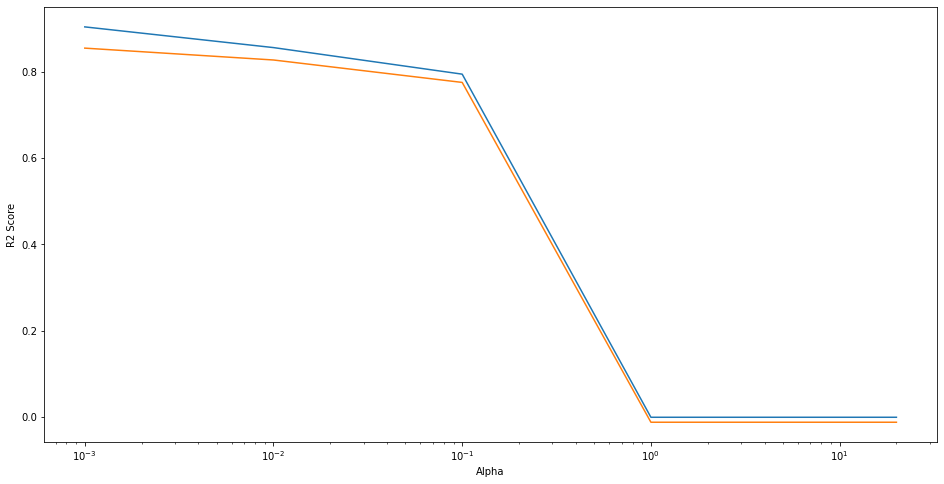

In [254]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [255]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [256]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


In [257]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [258]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
44,MiscVal,1.520128
25,BsmtHalfBath,0.541487
22,LowQualFinSF,0.378263
24,BsmtFullBath,0.373994
27,HalfBath,0.331081
12,BsmtFinType1,0.324486
67,Neighborhood_Gilbert,0.282619
2,LotShape,0.194391
18,HeatingQC,0.192283
62,Neighborhood_BrkSide,0.160200


#### Trying with the ridge regression

In [259]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9078417854243198
0.8431546903792685


- As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [260]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [261]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006982,0.002401,0.004089,0.001297,0.001,{'alpha': 0.001},0.857227,0.921110,0.784247,0.888754,...,0.916101,0.909313,0.905491,0.909927,0.904539,0.919577,0.907990,0.905931,0.909453,0.004661
1,0.004987,0.001094,0.003390,0.000797,0.010,{'alpha': 0.01},0.857575,0.921076,0.787061,0.888717,...,0.916096,0.909311,0.905490,0.909925,0.904538,0.919576,0.907988,0.905930,0.909451,0.004660
2,0.004987,0.000632,0.002991,0.000446,0.100,{'alpha': 0.1},0.860001,0.920751,0.809467,0.888356,...,0.915691,0.909194,0.905370,0.909782,0.904416,0.919531,0.907858,0.905810,0.909308,0.004637
3,0.005385,0.000798,0.003290,0.000779,0.200,{'alpha': 0.2},0.861470,0.920400,0.826262,0.887979,...,0.914888,0.908941,0.905113,0.909515,0.904155,0.919430,0.907577,0.905550,0.909009,0.004601
4,0.005685,0.000779,0.003490,0.000499,0.500,{'alpha': 0.5},0.863293,0.919315,0.853065,0.886984,...,0.912117,0.907923,0.904085,0.908512,0.903113,0.918988,0.906440,0.904497,0.907857,0.004556


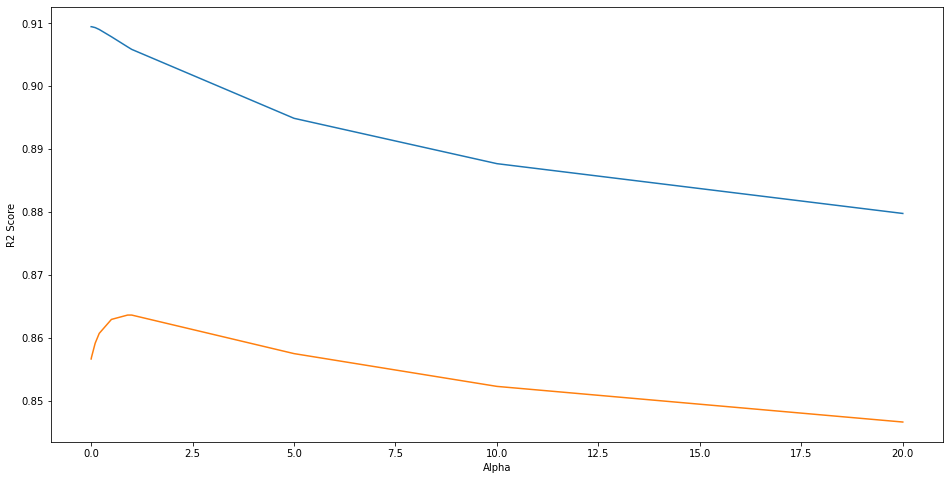

In [262]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph creating the model

In [263]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.9}

In [264]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.905199009080942
0.851741176450402


In [265]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [266]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
44,MiscVal,1.482910
25,BsmtHalfBath,0.574493
27,HalfBath,0.421184
22,LowQualFinSF,0.419674
24,BsmtFullBath,0.399218
67,Neighborhood_Gilbert,0.338057
40,EnclosedPorch,0.335071
31,TotRmsAbvGrd,0.286967
23,GrLivArea,0.266793
68,Neighborhood_IDOTRR,0.261202


- After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination, so will try to consider that as the final model.

#### Final Model

In [267]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9022070628442351
0.8575605370873767


- After compairing both the model we can see that the below Features are best explaining the DataSet

In [206]:
#MiscVal      : $Value of miscellaneous feature 
#BsmtHalfBath : Basement half bathrooms
#LowQualFinSF : Low quality finished square feet (all floors)
#BsmtFullBath : Basement full bathrooms
#HalfBath     : Half baths above grade

#### Best alpha value for Lasso : {'alpha': 0.001}
#### Best alpha value for Ridge : {'alpha': 0.9}